# Problem Statement

### Finding Sentiment of Picture's Text

# Describtion



#### -Finding sentiment in a picture's text, this will be helpfull in filtering put hatred on social media,
####  This is achieve  by making a generic sentiment based model using  160M dataset  and applying a OCR on top of it

# Constraints

#### Low latency as it will be consumed by social media users and there has to be low latency in detection of such issues

#### Cost of mis-classification is moderate.

# DATASET = https://www.kaggle.com/kazanova/sentiment140

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfVectorizer


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re

import spacy







In [2]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1", names=["target", "ids", "date", "flag", "user", "text"])
df.drop(['ids','flag','date','user'],axis=1,inplace=True)
df['target']=df['target'].apply(lambda x: x/4)





In [3]:
import seaborn as sns

sns.distplot(df['target'], kde=False, rug=True,bins=3); #SNS DISPLOT


# DATA IS BALANCED

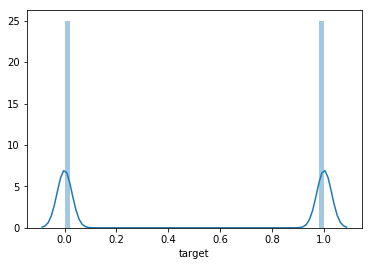

In [4]:
sns.distplot(df['target'])




### DATA FOLLOWS GAUSSIAN DISTRIBUTION , WITH NEGATIVE FOLLOWING LEFT SKEWNESS AND POSITVE BEING RIGHT SKEWED

# TEXT PREPROCCESING

In [5]:
from nltk.stem.porter import PorterStemmer




stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", #'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            #'won', "won't", 'wouldn', "wouldn't"
               ])

In [7]:
def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x = re.sub(r"http\S+", "", x)
     # specific
    x = re.sub(r"won't", "will not", x)
    x = re.sub(r"can\'t", "can not", x)

    # general
    x = re.sub(r"n\'t", " not", x)
    x = re.sub(r"\'re", " are", x)
    x = re.sub(r"\'s", " is", x)
    x = re.sub(r"\'d", " would", x)
    x = re.sub(r"\'ll", " will", x)
    x = re.sub(r"\'t", " not", x)
    x = re.sub(r"\'ve", " have", x)
    x = re.sub(r"\'m", " am", x)
    x = re.sub(r"http\S+", "", x)
    x= re.sub('[^A-Za-z]+', ' ', x)
    # https://gist.github.com/sebleier/554280
    x = ' '.join(e.lower() for e in x.split() if e.lower() not in stopwords)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')

    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [8]:
df['text'] = df['text'].apply(lambda x: preprocess(x))


In [9]:
df

,target,text
0,0.0,switchfoot awww bummer shoulda got david carr ...
1,0.0,upset not update facebook texting might cry re...
2,0.0,kenichan dived many times ball managed save pe...
3,0.0,whole body feels itchy like fir
4,0.0,nationwideclass no not behaving mad not se
5,0.0,kwesidei not whole crew
6,0.0,need hug
7,0.0,loltrish hey long time no see yes rains bit bi...
8,0.0,tatiana k nope not
9,0.0,twittera que muera


### Spliting the data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.text               #Spliting data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.30, random_state = 100)
X_cv, X_test, y_cv, y_test = train_test_split(X_train, y_train, train_size = 0.30, random_state = 100)

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#   Using TF-IDF to convert text into vectors


In [12]:
# Using TF-IDF to convert text into vectors
tfidf_vectorizer =  TfidfVectorizer(stop_words = stopwords, ngram_range=(1, 2)).fit(df['text']) # Creating tfidf object
tfidf_train = tfidf_vectorizer.fit_transform(X_train) #Converting Text to tfidf vectors
tfidf_cv = tfidf_vectorizer.transform(X_cv)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [13]:
#creating model

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Accuracy: 99.72708333333333


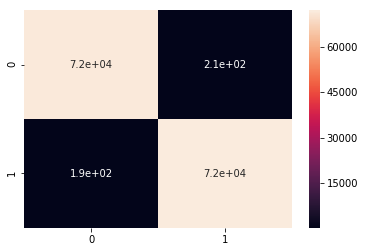

In [14]:
pac = PassiveAggressiveClassifier(max_iter = 50)            #Passive Classifier
pac.fit(tfidf_train, y_train)
cv_pred = pac.predict(tfidf_cv)
pac_score_cv = accuracy_score(y_cv, cv_pred)*100
print('Accuracy:', pac_score_cv)
cm= confusion_matrix(y_cv, cv_pred)

sns.heatmap(cm,annot=True)

~~~~~~~Accuracy on Test data~~~~~~~~~~~: 99.7154761904762


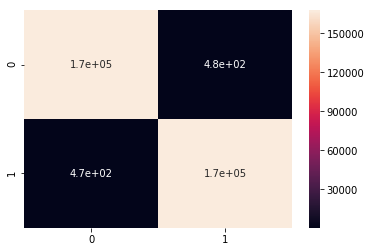

In [15]:
test_pred = pac.predict(tfidf_test)                        #Testing of Passive Classifier of Test data
pac_score_test = accuracy_score(y_test, test_pred)*100
print('~~~~~~~Accuracy on Test data~~~~~~~~~~~:', pac_score_test)
cm1= confusion_matrix(y_test, test_pred)

sns.heatmap(cm1,annot=True)

In [16]:
# importing modules
import cv2
import pytesseract

# reading image using opencv
image = cv2.imread('samplepositive.jpg')

#converting image into gray scale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# converting it to binary image by Thresholding
# this step is require if you have colored image because if you skip this part 
# then tesseract won't able to detect text correctly and this will give incorrect result
threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# display image
#cv2.imshow( '',threshold_img)

# Maintain output window until user presses a key
#cv2.waitKey(0)

# Destroying present windows on screen
#cv2.destroyAllWindows()

# USING OCR TO READ IMAGE TEXT

In [22]:
 #configuring parameters for tesseract
custom_config = r'--oem 3 --psm 6'


# 0	Legacy engine only
# 1	Neural net LSTM only
# 2	Legacy + LSTM mode only
# 3	By Default, based on what is currently available

# now feeding image to tesseract
details = pytesseract.image_to_data(threshold_img, config=custom_config)


print(details)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	850	400	-1	
2	1	1	0	0	0	21	80	764	304	-1	
3	1	1	1	0	0	21	80	764	304	-1	
4	1	1	1	1	0	215	80	570	32	-1	
5	1	1	1	1	1	215	81	83	31	0	eo
5	1	1	1	1	2	364	81	80	27	96	Anger,
5	1	1	1	1	3	455	80	81	21	96	hatred
5	1	1	1	1	4	546	80	45	21	95	and
5	1	1	1	1	5	599	80	107	28	95	jealousy
5	1	1	1	1	6	716	86	69	15	96	never
4	1	1	1	2	0	193	117	576	33	-1	
5	1	1	1	2	1	193	127	47	23	54	4
5	1	1	1	2	2	380	117	64	21	96	solve
5	1	1	1	2	3	455	117	117	28	96	problems,
5	1	1	1	2	4	575	117	66	28	96	only
5	1	1	1	2	5	650	117	119	25	96	affection,
4	1	1	1	3	0	21	152	762	56	-1	
5	1	1	1	3	1	21	152	41	56	39	(A
5	1	1	1	3	2	118	183	4	3	0	d
5	1	1	1	3	3	139	152	41	10	18	cee
5	1	1	1	3	4	263	172	4	7	0	f
5	1	1	1	3	5	368	160	98	15	96	concern
5	1	1	1	3	6	476	154	45	21	96	and
5	1	1	1	3	7	532	156	93	26	96	respect
5	1	1	1	3	8	635	160	24	15	96	can
5	1	1	1	3	9	663	154	36	21	95	do
5	1	1	1	3	10	703	154	80	21	96	that.
4	1	1	1	4	0	65	198	23	14	

In [23]:
testtext =  preprocess(details)



In [24]:
testtext

'level page num block num par num line num word num left top width height conf text eo anger hatred jealousy never solve problems affection cee f concern respect se aed f v az quot'

In [25]:
text_vect = tfidf_vectorizer.transform(([testtext]))  

In [26]:
pred = pac.predict(text_vect)      #predicting Test Text



In [27]:
pred

array([1.])

In [28]:
#Positive 